In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
import s1 

In [3]:
lmax = 5000
ell = np.arange(0,lmax)
ellsc = 360*60/ell
norm = ell * (ell+1) / (2*np.pi)

<ipython-input-3-c3ea14d743fb>:3: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 360*60/ell


66

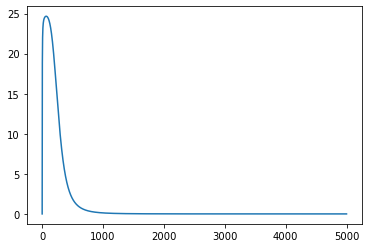

In [38]:

dl_pwl = ell**2 / (5e9 + ell**4) * 2e10
cl_pwl = dl_pwl
cl_pwl[1:] = dl_pwl[1:]/ norm[1:]
plt.plot (ell , dl_pwl)
plt.xlabel("")
np.argmax (dl_pwl)

In [5]:

nside_2048 = 2048
nside_0256 = 256

In [6]:
map_pwl_2048 = hp.synfast (cl_pwl , nside_2048)
map_pwl_0256 = hp.synfast (cl_pwl , nside_0256)

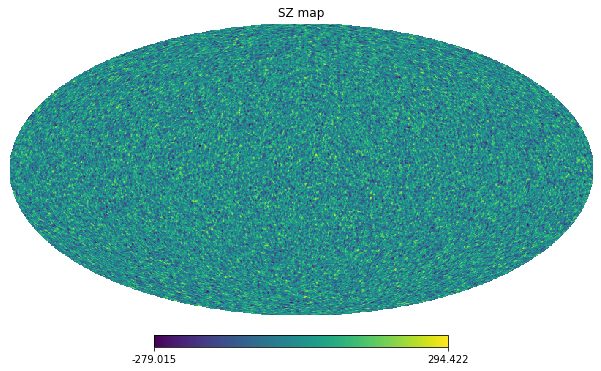

In [7]:
hp.mollview(map_pwl_0256 ,title="SZ map")

In [20]:
resol_0256 = hp.nside2resol (nside_0256 , arcmin = False)
resol_0256_arcmin = hp.nside2resol (nside_0256 , arcmin = True)
jmax = 10 
theta_bin = 10000

In [9]:
mor_l_0256 = s1.morlet_arr (resol_0256, jmax , lmax, theta_bin)
gaus_l_0256 = s1.gaus_arr (resol_0256, jmax, lmax, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


Text(0, 0.5, 'log(S1)')

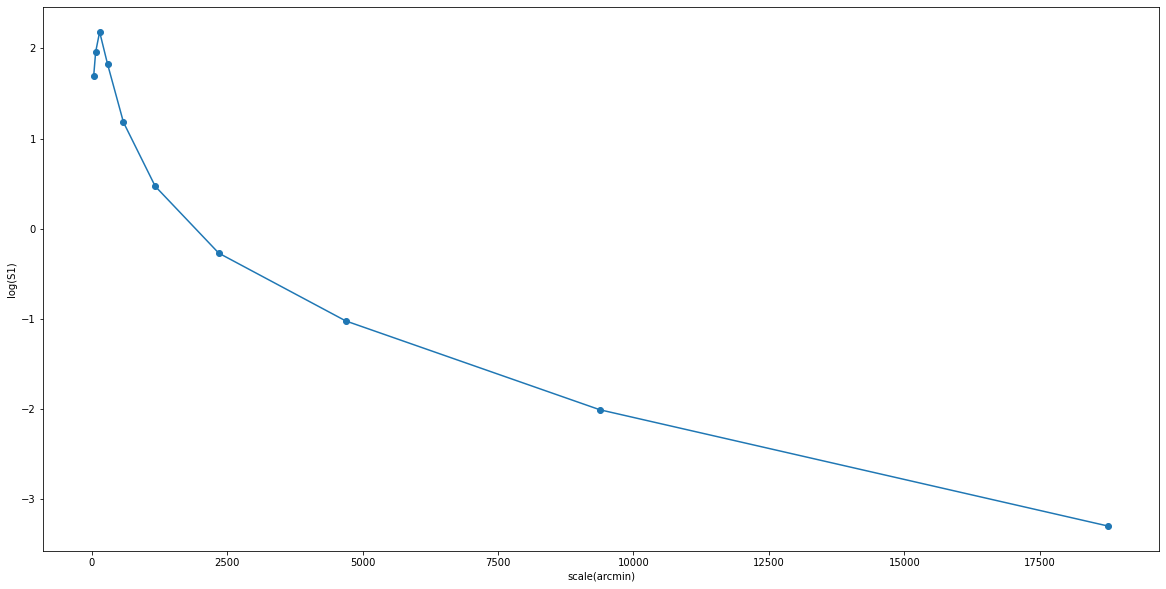

In [44]:
Jf=np.arange(jmax)
res_arcmin = hp.nside2resol(nside, arcmin=True)
scale=2**Jf*((2*res_arcmin)/0.75)
plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_pwl),'o-')
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 

In [45]:
cl_pwl_out = hp.anafast(map_pwl)

In [46]:
map_pwl_out = hp.synfast(cl_pwl_out , nside)

In [47]:
s1_pwl_out , i1_pwl_out = s1.compS1 (map_pwl_out , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'log(S1)')

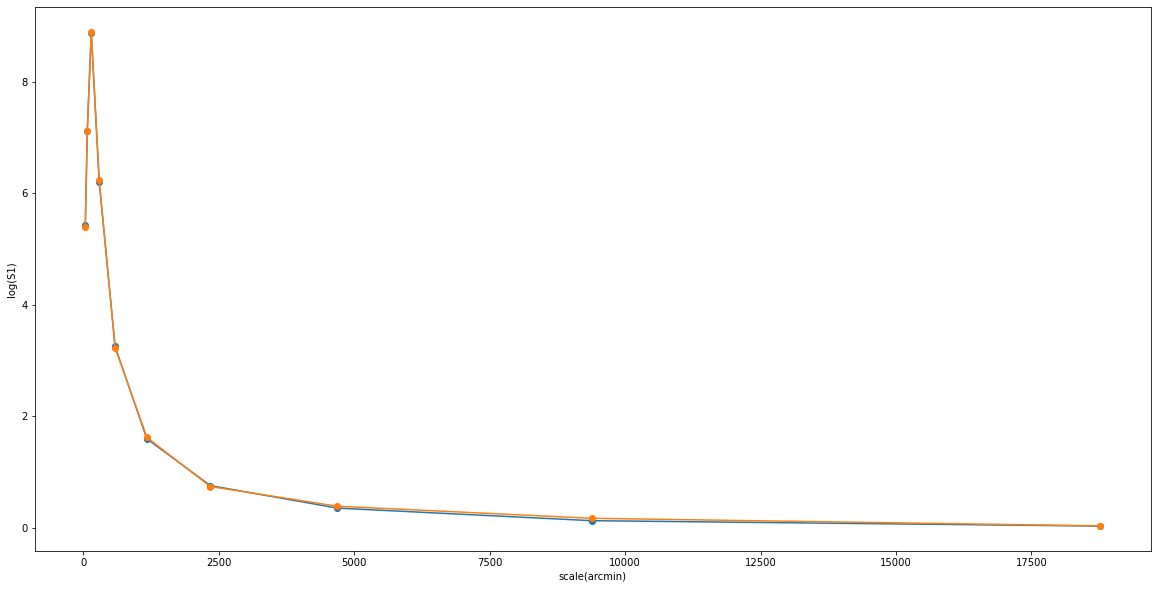

In [48]:
Jf=np.arange(jmax)
res_arcmin = hp.nside2resol(nside, arcmin=True)
scale=2**Jf*((2*res_arcmin)/0.75)
plt.figure(figsize=(20,10))
plt.plot (scale,s1_pwl,'o-')
plt.plot (scale,s1_pwl_out,'o-')
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 

In [49]:
%%time 
s2_pwl  = s1.compS2 (map_pwl , i1_pwl, mor_l, gaus_l , resol, jmax, lmax , nside )

0
1
2
3
4
5
6
7
8
9
CPU times: user 35min 39s, sys: 43.7 s, total: 36min 23s
Wall time: 10min 24s


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


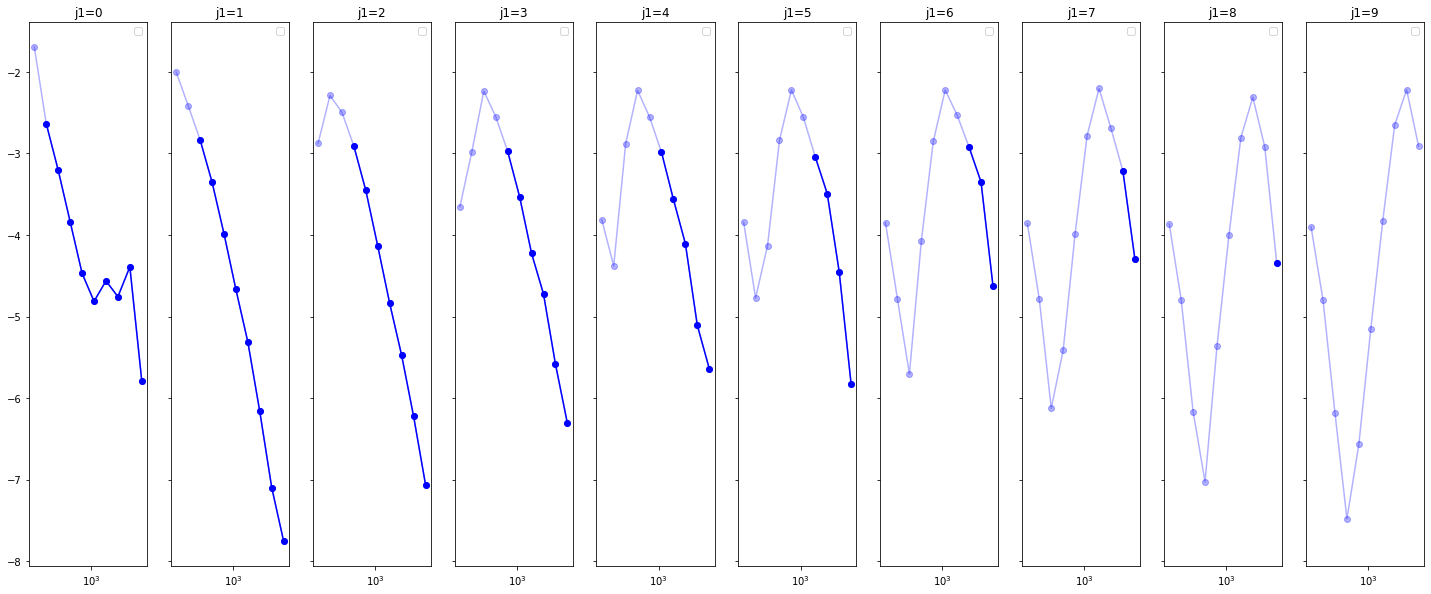

In [50]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale,np.log(s2_pwl[j,:]/s1_pwl[j]),'o-' ,alpha = 0.3 ,color = "blue")
    ax[j].plot (scale[j+1:],np.log(s2_pwl[j,j+1:]/s1_pwl[j]),'o-' , alpha =1 , color = "blue")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()

In [51]:
%%time 
s2_pwl_out  = s1.compS2 (map_pwl_out , i1_pwl_out, mor_l, gaus_l , resol, jmax, lmax , nside )

0
1
2
3
4
5
6
7
8
9
CPU times: user 35min 47s, sys: 38.8 s, total: 36min 26s
Wall time: 10min 4s


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


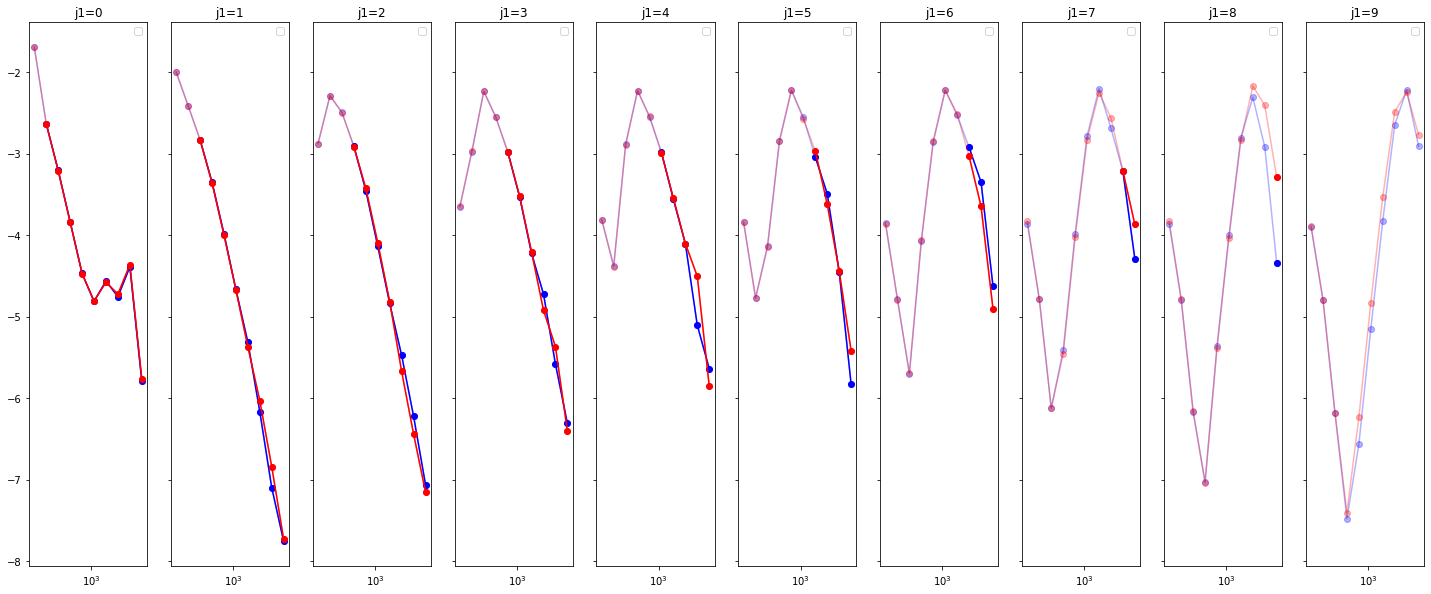

In [52]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale,np.log(s2_pwl[j,:]/s1_pwl[j]),'o-' ,alpha = 0.3 ,color = "blue")
    ax[j].plot (scale[j+1:],np.log(s2_pwl[j,j+1:]/s1_pwl[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale,np.log(s2_pwl_out[j,:]/s1_pwl_out[j]),'o-' ,alpha = 0.3 ,color = "red")
    ax[j].plot (scale[j+1:],np.log(s2_pwl_out[j,j+1:]/s1_pwl_out[j]),'o-' , alpha =1 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()

In [137]:
nside = 2048
resol = hp.nside2resol (nside , arcmin = False)
jmax = 10 
theta_bin = 10000

In [138]:
mor_l = s1.morlet_arr (resol, jmax , lmax, theta_bin)
gaus_l = s1.gaus_arr (resol, jmax, lmax, theta_bin)

In [139]:
map_pwl_2048 = hp.synfast(cl_pwl , nside)

In [140]:
s1_pwl_2048 , i1_pwl_2048 = s1.compS1 (map_pwl_2048 , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


In [ ]:
Jf=np.arange(jmax)
res_0256_arcmin = hp.nside2resol(256, arcmin=True)
scale_0256=2**Jf*((2*res_0256_arcmin)/0.75)
res_2048_arcmin = hp.nside2resol(2048, arcmin=True)
scale_2048=2**Jf*((2*res_2048_arcmin)/0.75)

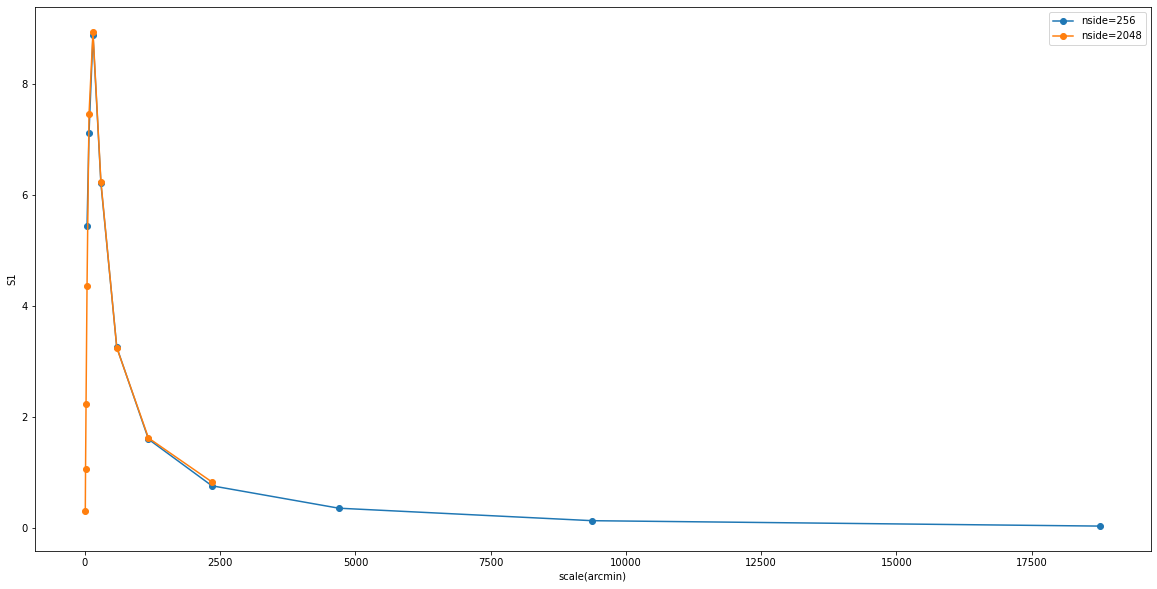

In [144]:

plt.figure(figsize=(20,10))
plt.plot (scale_0256,s1_pwl,'o-')
plt.plot (scale_2048,s1_pwl_2048,'-o')
plt.xlabel("scale(arcmin)")
plt.ylabel("S1") 
plt.legend (["nside=256" , "nside=2048"])

In [12]:
map_nonGauss_0256 = map_pwl_0256 **2

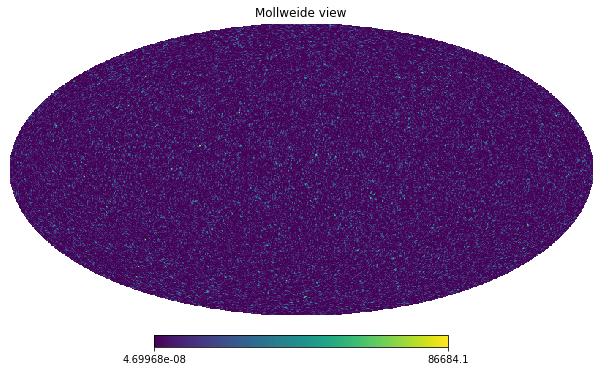

In [13]:
hp.mollview (map_nonGauss_0256)

In [14]:
cl_nonGauss = hp.anafast(map_nonGauss_0256)

<ipython-input-15-e0fa18cc7284>:3: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_nonGauss = 360*60/ell_nonGauss


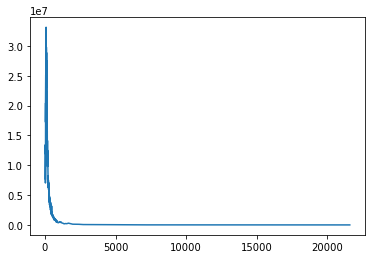

In [15]:
lmax_nonGauss = cl_nonGauss.shape[0]
ell_nonGauss = np.arange (0,lmax_nonGauss)
ellsc_nonGauss = 360*60/ell_nonGauss
norm_nonGauss = ell_nonGauss * (ell_nonGauss+1) / (2*np.pi)
dl_nonGauss = norm_nonGauss*cl_nonGauss
plt.plot (ellsc_nonGauss,dl_nonGauss)

In [16]:
map_Gauss_0256 = hp.synfast(cl_nonGauss , nside_0256)

In [17]:
s1_nonGauss_0256 , i1_nonGauss_0256 = s1.compS1 (map_nonGauss_0256 , mor_l_0256, gaus_l_0256, resol_0256, jmax , lmax_nonGauss , nside_0256)

0
1
2
3
4
5
6
7
8
9


In [18]:
s1_Gauss_0256 , i1_Gauss_0256 = s1.compS1 (map_Gauss_0256 , mor_l_0256, gaus_l_0256, resol_0256, jmax , lmax_nonGauss , nside_0256)

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'log(S1)')

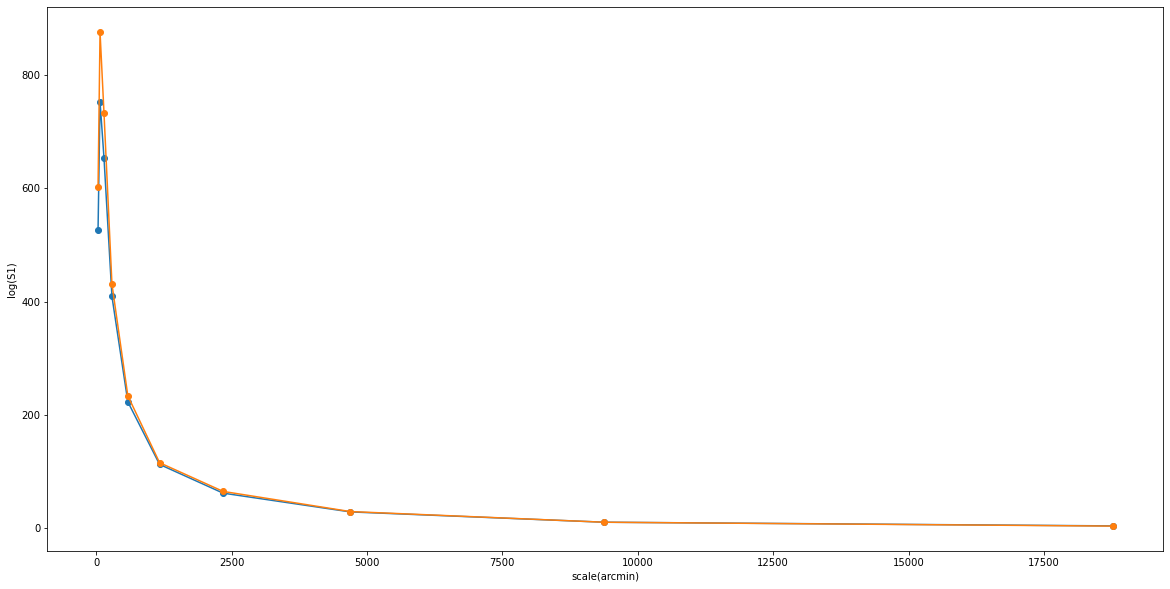

In [22]:
Jf = np.arange(0 , jmax)
scale_0256 = 2**Jf*((2*resol_0256_arcmin)/0.75)
plt.figure(figsize=(20,10))
plt.plot (scale_0256,s1_nonGauss_0256,'o-')
plt.plot (scale_0256,s1_Gauss_0256,'o-')
#plt.plot (ellsc_nonGauss , np.log(dl_nonGauss))
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 

In [23]:
%%time 
s2_nonGauss_0256  = s1.compS2 (map_nonGauss_0256 , i1_nonGauss_0256, mor_l_0256, gaus_l_0256 , resol_0256, jmax, lmax_nonGauss , nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 1min 9s, sys: 1.66 s, total: 1min 11s
Wall time: 20.5 s


In [24]:
%%time 
s2_Gauss_0256  = s1.compS2 (map_Gauss_0256 , i1_Gauss_0256, mor_l_0256, gaus_l_0256 , resol_0256, jmax, lmax_nonGauss , nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 1min 8s, sys: 1.58 s, total: 1min 10s
Wall time: 20.4 s


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


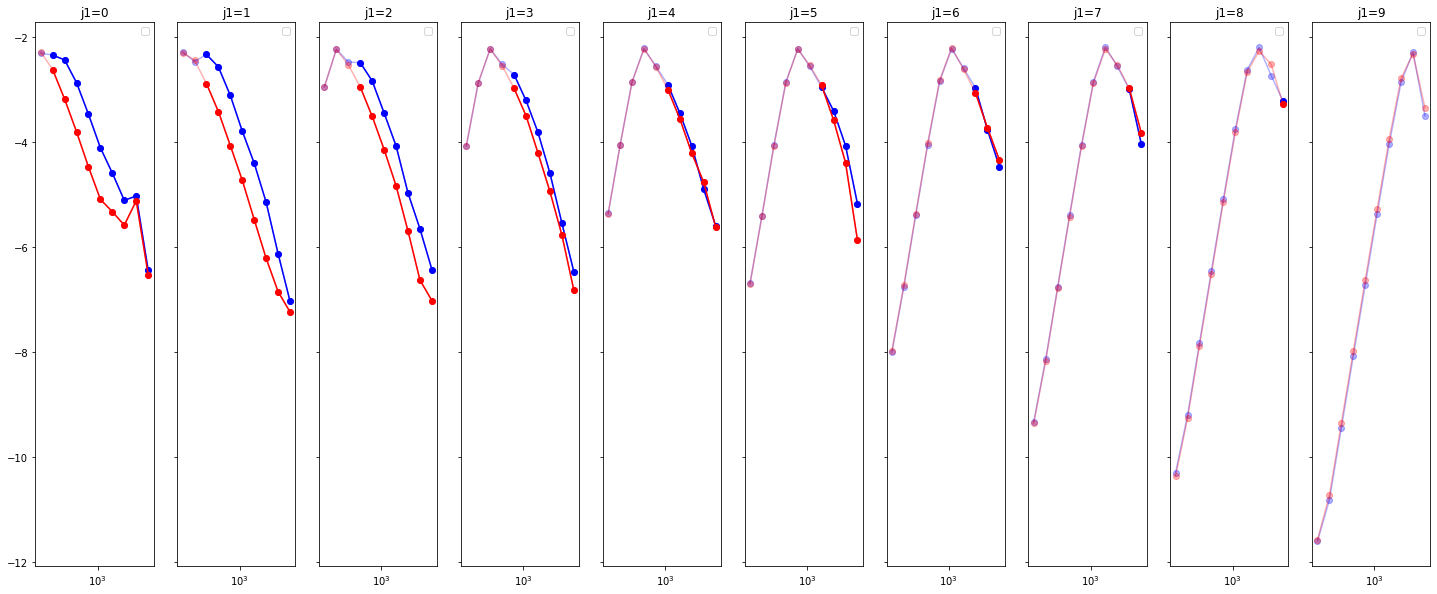

In [25]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_0256,np.log(s2_nonGauss_0256[j,:]/s1_nonGauss_0256[j]),'o-' ,alpha = 0.3 ,color = "blue")
    ax[j].plot (scale_0256[j+1:],np.log(s2_nonGauss_0256[j,j+1:]/s1_nonGauss_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_0256,np.log(s2_Gauss_0256[j,:]/s1_Gauss_0256[j]),'o-' ,alpha = 0.3 ,color = "red")
    ax[j].plot (scale_0256[j+1:],np.log(s2_Gauss_0256[j,j+1:]/s1_Gauss_0256[j]),'o-' , alpha =1 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()